In [41]:
import numpy as np
import os
import matplotlib.pyplot as plt
from src.sample_tiles import get_triplet_imgs, get_triplet_tiles
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [42]:
import sys
sys.path.append('../')

In [48]:
img_dir = '/storage/EuroSATallBands/AnnualCrop' # directory where images are saved
img_triplets = get_triplet_imgs(img_dir, ".tif", n_triplets=10)
print(img_triplets[:5,:])

[['AnnualCrop_330.tif' 'AnnualCrop_1991.tif']
 ['AnnualCrop_2270.tif' 'AnnualCrop_2138.tif']
 ['AnnualCrop_657.tif' 'AnnualCrop_854.tif']
 ['AnnualCrop_2639.tif' 'AnnualCrop_500.tif']
 ['AnnualCrop_1774.tif' 'AnnualCrop_909.tif']]


In [55]:
tile_dir = 'data/annual_crops' # where you want to save your tiles
tiles = get_triplet_tiles(tile_dir,
                          img_dir, 
                          img_triplets, 
                          tile_size=30,
                          val_type='float32',
                          bands_only=True,
                          save=True,
                          verbose=True)

Sampling image AnnualCrop_1038.tif
    Saving distant tile #7
    Distant tile center:(44, 68)
Sampling image AnnualCrop_1133.tif
    Saving distant tile #8
    Distant tile center:(44, 43)
Sampling image AnnualCrop_132.tif
    Saving anchor and neighbor tile #6
    Anchor tile center:(23, 29)
    Neighbor tile center:(45, 25)
Sampling image AnnualCrop_1440.tif
    Saving anchor and neighbor tile #9
    Anchor tile center:(33, 67)
    Neighbor tile center:(27, 15)
Sampling image AnnualCrop_1563.tif
    Saving distant tile #9
    Distant tile center:(75, 20)
Sampling image AnnualCrop_1609.tif
    Saving distant tile #6
    Distant tile center:(68, 67)
Sampling image AnnualCrop_1774.tif
    Saving anchor and neighbor tile #4
    Anchor tile center:(28, 39)
    Neighbor tile center:(74, 16)
Sampling image AnnualCrop_1926.tif
    Saving anchor and neighbor tile #5
    Anchor tile center:(27, 61)
    Neighbor tile center:(37, 22)
Sampling image AnnualCrop_1991.tif
    Saving distant tile #0

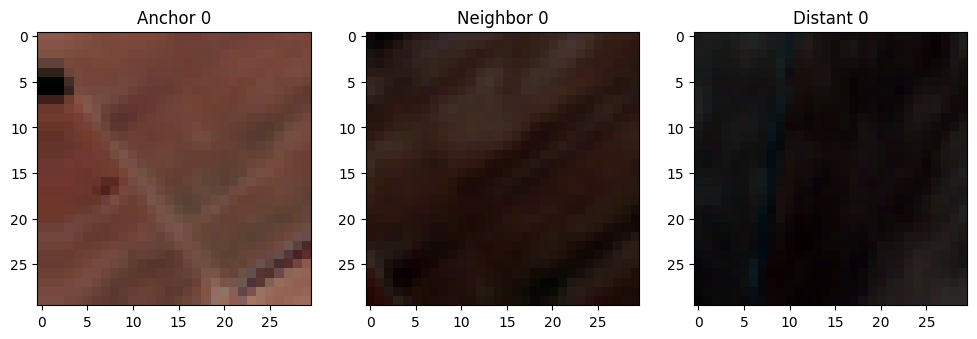

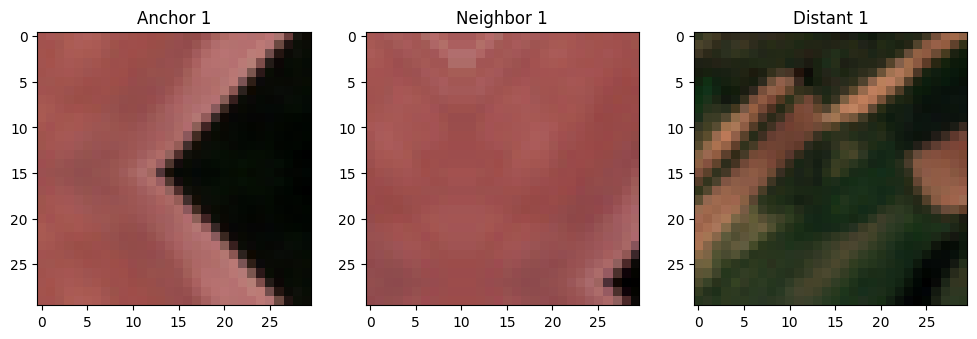

In [56]:
tile_dir = 'data/annual_crops/'
n_triplets = 2
plt.rcParams['figure.figsize'] = (12,4)
for i in range(n_triplets):
    tile = np.load(os.path.join(tile_dir, str(i)+'anchor.npy'))
    neighbor = np.load(os.path.join(tile_dir, str(i)+'neighbor.npy'))
    distant = np.load(os.path.join(tile_dir, str(i)+'distant.npy'))
    
    vmin = np.array([tile, neighbor, distant]).min()
    vmax = np.array([tile, neighbor, distant]).max()

    tile = (tile - np.min(tile, axis = (0,1)))/ np.max(tile, axis = (0,1)) # TODO better normalization
    neighbor = (neighbor - np.min(neighbor, axis = (0,1)))/ np.max(neighbor, axis = (0,1)) # TODO better normalization
    distant = (distant - np.min(distant, axis = (0,1)))/ np.max(distant, axis = (0,1)) # TODO better normalization

    plt.figure()
    plt.subplot(1,3,1)
    plt.imshow(tile[:,:,[3,2,1]])
    plt.title('Anchor '+str(i))
    plt.subplot(1,3,2)
    plt.imshow(neighbor[:,:,[3,2,1]])
    plt.title('Neighbor '+str(i))
    plt.subplot(1,3,3)
    plt.imshow(distant[:,:,[3,2,1]])
    plt.title('Distant '+str(i))

above are multispectral images of the tiles, visibly those are in quite innatural colors


## Labels
there are additional csv files - train val and test, along with label_map.json.

Each contain paths to certain images, label number and class name

In [10]:
import pandas as pd
df = pd.read_csv("/storage/EuroSATallBands/train.csv")
df.head()

,Filename,Label,ClassName
0,PermanentCrop/PermanentCrop_2401.tif,6,PermanentCrop
1,PermanentCrop/PermanentCrop_1006.tif,6,PermanentCrop
2,HerbaceousVegetation/HerbaceousVegetation_1025...,2,HerbaceousVegetation
3,SeaLake/SeaLake_1439.tif,9,SeaLake
4,River/River_1052.tif,8,River


In [11]:
df = pd.read_csv("/storage/EuroSATallBands/test.csv")
df.head()

,Filename,Label,ClassName
0,HerbaceousVegetation/HerbaceousVegetation_2000...,2,HerbaceousVegetation
1,HerbaceousVegetation/HerbaceousVegetation_514.tif,2,HerbaceousVegetation
2,Residential/Residential_597.tif,7,Residential
3,River/River_2122.tif,8,River
4,SeaLake/SeaLake_2747.tif,9,SeaLake


In [12]:
df = pd.read_csv("/storage/EuroSATallBands/test.csv")
df.head()

,Filename,Label,ClassName
0,HerbaceousVegetation/HerbaceousVegetation_2000...,2,HerbaceousVegetation
1,HerbaceousVegetation/HerbaceousVegetation_514.tif,2,HerbaceousVegetation
2,Residential/Residential_597.tif,7,Residential
3,River/River_2122.tif,8,River
4,SeaLake/SeaLake_2747.tif,9,SeaLake


label map contains map from label number to class name

In [13]:
import json

with open("/storage/EuroSATallBands/label_map.json", "r") as file:
    label_map = json.load(file)

In [14]:
label_map

{'AnnualCrop': 0,
 'Forest': 1,
 'HerbaceousVegetation': 2,
 'Highway': 3,
 'Industrial': 4,
 'Pasture': 5,
 'PermanentCrop': 6,
 'Residential': 7,
 'River': 8,
 'SeaLake': 9}

## Band analysis

In [29]:
print("max values for each band:\n", img.max(axis=(0,1)))
print("min values for each band:\n", img.min(axis=(0,1)))

max values for each band:
 [1982. 2159. 2291. 2774. 2799. 4236. 5190. 5034.  995.   18. 4263. 3516.
 5550.]
min values for each band:
 [1396. 1084. 1071.  630. 1173. 1984. 2225. 2068.  563.   12. 1380.  561.
 2478.]


## Band descriptions


| Band | Resolution | Central Wavelength | Description                            |
|------|------------|--------------------|----------------------------------------|
| B1   | 60 m       | 443 nm             | Ultra Blue (Coastal and Aerosol)       |
| B2   | 10 m       | 490 nm             | Blue                                   |
| B3   | 10 m       | 560 nm             | Green                                  |
| B4   | 10 m       | 665 nm             | Red                                    |
| B5   | 20 m       | 705 nm             | Visible and Near Infrared (VNIR)      |
| B6   | 20 m       | 740 nm             | Visible and Near Infrared (VNIR)      |
| B7   | 20 m       | 783 nm             | Visible and Near Infrared (VNIR)      |
| B8   | 10 m       | 842 nm             | Visible and Near Infrared (VNIR)      |
| B8a  | 20 m       | 865 nm             | Visible and Near Infrared (VNIR)      |
| B9   | 60 m       | 940 nm             | Short Wave Infrared (SWIR)            |
| B10  | 60 m       | 1375 nm            | Short Wave Infrared (SWIR)            |
| B11  | 20 m       | 1610 nm            | Short Wave Infrared (SWIR)            |
| B12  | 20 m       | 2190 nm            | Short Wave Infrared (SWIR)            |


## Analysis of image based on a single one

In [71]:
from osgeo import gdal


sample_filepath = '/storage/EuroSATallBands/River/River_2115.tif'

val_type = "float32"
obj = gdal.Open(sample_filepath)
if val_type == 'uint8':
    img = obj.ReadAsArray().astype(np.uint8)
elif val_type == 'float32':
    img = obj.ReadAsArray().astype(np.float32)
else:
    raise ValueError('Invalid val_type for image values. Try uint8 or float32.')
img = np.moveaxis(img, 0, -1)

In [72]:
print("Image shape: ", img.shape)
print("Image type: ", type(img))

Image shape:  (64, 64, 13)
Image type:  <class 'numpy.ndarray'>


### bands visualization

https://custom-scripts.sentinel-hub.com/custom-scripts/sentinel-2/composites/

https://gisgeography.com/sentinel-2-bands-combinations/


Number of bands in each image:  13


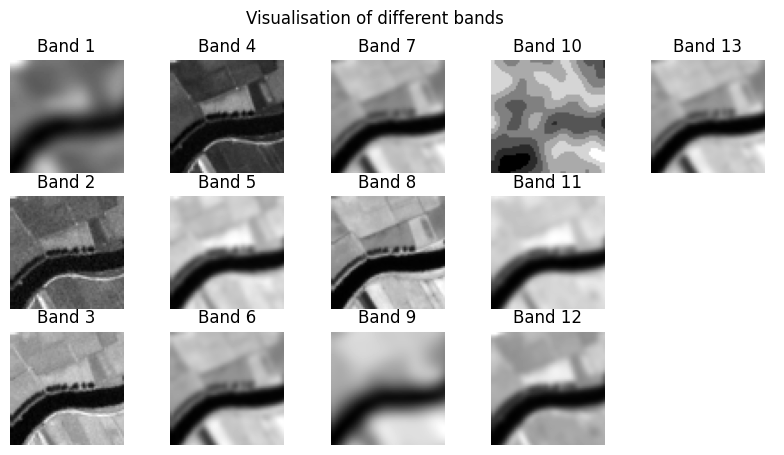

In [73]:
bands = img.shape[2]
print("Number of bands in each image: ", bands)

nrows = 3
fig, axs = plt.subplots(3, bands // nrows + 1, figsize=(10, 5))
if bands == 1:
    axs = [axs]
for i in range(bands):
    axs[i % 3, i // nrows].imshow(img[:,:, i], cmap='gray')  
    axs[i % 3, i // nrows].set_title(f'Band {i+1}')

for i in range(nrows * (bands // nrows + 1)):
    axs[i % 3, i // nrows].axis('off')


fig.suptitle("Visualisation of different bands")
plt.show()

In [74]:
img_maxes = np.max(img, axis = (0,1)) # TODO better normalization
img_mins = np.min(img, axis = (0,1))
img = (img - img_mins)/ img_maxes

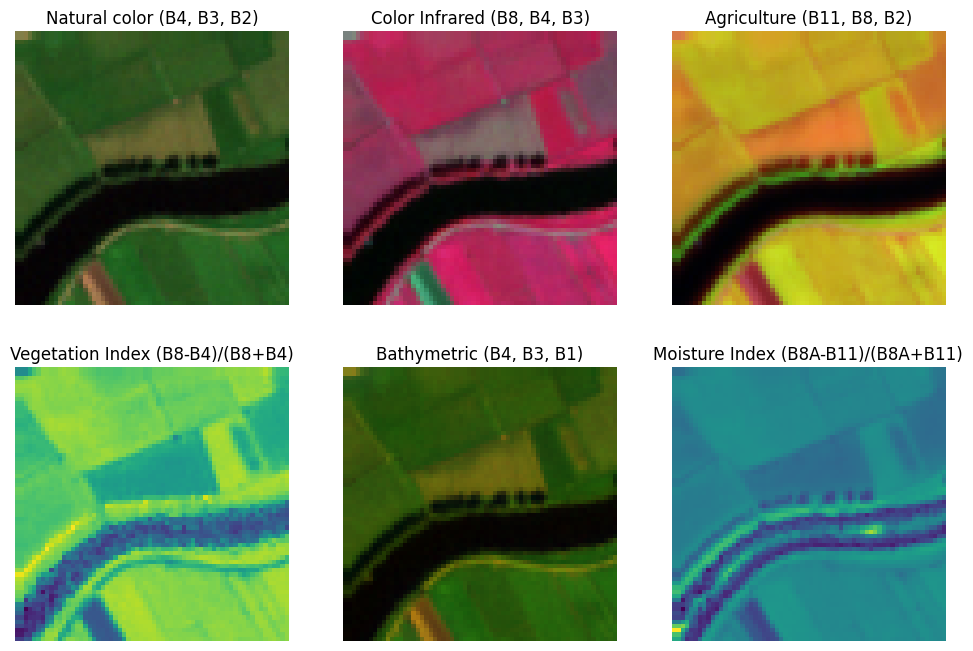

In [89]:
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

axs[0, 0].imshow(img[:, :, [3,2,1]])
axs[0, 0].axis("off")
axs[0, 0].set_title("Natural color (B4, B3, B2)")


axs[0, 1].imshow(img[:, :, [7,3,2]])
axs[0, 1].axis("off")
axs[0, 1].set_title("Color Infrared (B8, B4, B3)")



axs[0, 2].imshow(img[:, :, [10,7,1]])
axs[0, 2].axis("off")
axs[0, 2].set_title("Agriculture (B11, B8, B2)")


vegetation_index = (img[:, :, 7] - img[:, :, 3]) / (img[:, :, 7] + img[:, :, 3])
axs[1, 0].imshow(vegetation_index)
axs[1, 0].axis("off")
axs[1, 0].set_title("Vegetation Index (B8-B4)/(B8+B4)")




axs[1, 1].imshow(img[:, :, [3,2,0]])
axs[1, 1].axis("off")
axs[1, 1].set_title("Bathymetric (B4, B3, B1)")


moistrure_index = (img[:, :, 7] - img[:, :, 10]) / (img[:, :, 7] + img[:, :, 10])

axs[1, 2].imshow(moistrure_index)
axs[1, 2].axis("off")
axs[1, 2].set_title("Moisture Index (B8A-B11)/(B8A+B11)")
#

fig.show()

## **description of the plot**
Each image contains information extracted from different bands

1. **Natural color**

Simply the RGB bands extracted to create an image

2. **Color Infrared**

Used to emphasize healthy and unhealthy vegetation - band 8 reflects very well chlorophyll. Better, denser vegetation is red

3. **Agriculture**

The agriculture band combination uses SWIR-1 (B11), near-infrared (B8), and blue (B2). It’s mostly used to monitor the health of crops because of how it uses short-wave and near-infrared. Both these bands are particularly good at highlighting dense vegetation that appears as dark green.

4. **Vegetation index**

Because near-infrared (which vegetation strongly reflects) and red light (which vegetation absorbs), the vegetation index is good for quantifying the amount of vegetation. The formula for the normalized difference vegetation index is (B8-B4)/(B8+B4). While high values suggest dense canopy, low or negative values indicate urban and water features.

5. **Bathymetric**

As the name implies, the bathymetric band combination is good for coastal studies. The bathymetric band combination uses the red (B4), green (B3), and coastal band (B1). Using the coastal aerosol band is good for estimating suspended sediment in the water.

6. **Moisture Index**
The moisture index is ideal for finding water stress in plants. It uses the short-wave and near-infrared to generate an index of moisture content. In general, wetter vegetation has higher values. But lower moisture index values suggest plants are under stress from insufficient moisture.

